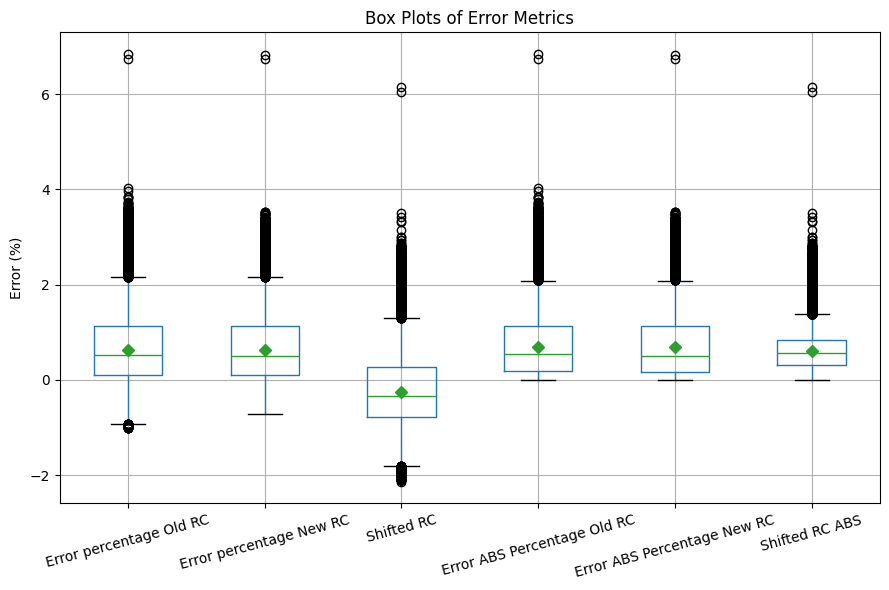

Plotted and saved to: C:\Users\smncd\OneDrive - University of Missouri\MS_T\Research\Excels based on mail\error_boxplots.png


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
from pathlib import Path

path = Path(r"C:\Users\smncd\OneDrive - University of Missouri\MS_T\Research\Excels based on mail\Results_comparison.csv")
out = path.with_name("error_boxplots.png")

# Read and normalize headers
df = pd.read_csv(path)

def _norm(s):
    if not isinstance(s, str):
        return s
    s = unicodedata.normalize("NFKC", s)  # unify unicode lookalikes
    s = s.replace("\u200b", "")           # zero-width space
    s = s.replace("\xa0", " ")            # non-breaking space
    s = s.replace("\r", " ").replace("\n", " ")
    return s.strip()

df.rename(columns=lambda c: _norm(c), inplace=True)

# The two columns that actually exist in your file
selected = ['Error percentage Old RC', 'Error percentage New RC','Shifted RC',  'Error ABS Percentage Old RC',
            'Error ABS Percentage New RC','Shifted RC ABS']
selected = [c for c in selected if c in df.columns]

# Convert to numeric and drop rows where both selected cols are NaN
for c in selected:
    df[c] = pd.to_numeric(df[c], errors="coerce")
plot_df = df[selected].dropna(how="all")

if plot_df.empty:
    raise ValueError("No numeric data in the selected columns after cleaning.")

# Plot
plt.figure(figsize=(9, 6))
ax = plot_df.boxplot(
    column=selected,
    grid=True,
    showmeans=True,
    meanprops={"marker":"D", "markersize":6},
    whis=1,
)
ax.set_title("Box Plots of Error Metrics")
ax.set_ylabel("Error (%)")
ax.set_xticklabels(selected ,rotation=15)
plt.tight_layout()
plt.savefig(out, dpi=300)
plt.show()

print("Plotted and saved to:", out)
